In [63]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [68]:
data = pd.read_excel("US-BasedCovid19Tweets.xlsx") 
data.head(1)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,RT @kahruveldesign: …he wrote on Jan. 23. “My ...,False,0,NaN,2020-05-09 22:25:07,False,NaN,1259248057582940161,NaN,"<a href=""http://twitter.com/download/android"" ...",thinkalot,1,True,False,NaN,NaN


In [4]:
from nltk.corpus import stopwords
#applying pre-processing steps to remove stopwords and words of size less than 2
data['text'] = data['text'].apply(lambda x: x.split())
wordsEng = stopwords.words('english')
data['text'] = data['text'].apply(lambda x:[item for item in x if item not in wordsEng])
data['text'] = data['text'].apply(lambda x: [w for w in x if len(w)>2])
data['text'] = data['text'].apply(lambda x: " ".join(x))
data.head(2)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,@kahruveldesign: …he wrote Jan. 23. “My phones...,False,0,NaN,2020-05-09 22:25:07,False,NaN,1259248057582940161,NaN,"<a href=""http://twitter.com/download/android"" ...",thinkalot,1,True,False,NaN,NaN
2,Please Share This Warning. It's Not About Popu...,False,0,NaN,2020-05-09 22:22:13,True,NaN,1259247327904256003,NaN,"<a href=""http://twitter.com/download/iphone"" r...",DRandall,0,False,False,NaN,NaN


In [5]:
data.reset_index(inplace=True)

In [5]:
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
TEXT=[]
#Rating=[]
for i in range(len(data)):
    #if data['cetagory'][i]=='Racing':
    review = re.sub('[^a-zA-Z]', ' ',data['text'][i])
    #review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['reviews'][i])
    #review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['reviews'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    TEXT.append(review)
    #Rating.append(data['rating'][i])

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
sid = SentimentIntensityAnalyzer()
Sentiment=[]
PositiveTweet=[]
NegativeTweet=[]

from textblob import TextBlob
# the variable 'message_text' now contains the text we will analyze.
for i in range(len(data)):   
    #message_text = 'i hate you'

#print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    b = TextBlob(data.text[i])
    #scores = sid.polarity_scores(data.reviews[i])
    value=b.sentiment[0]
    if value<=0:
        Sentiment.append(0)
        NegativeTweet.append(data.text[i])
    else:
        Sentiment.append(1)
        PositiveTweet.append(data.text[i])


In [46]:
df = pd.DataFrame(
    {'NEG': NegativeTweet
    })

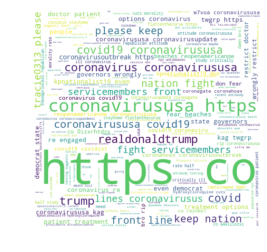

In [47]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.NEG:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
mask = np.array(Image.open('pos.png')) 
wordcloud = WordCloud(mask=mask, background_color="white",
                max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],stopwords = stopwords).generate(comment_words)
  
# plot the WordCloud image                       
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('Negative.png')
plt.show()

In [69]:
import itertools
import collections
data['text'] = data['text'].apply(lambda x: x.split())
wordsEng = stopwords.words('english')
data['text'] = data['text'].apply(lambda x:[item for item in x if item not in wordsEng])
data['text'] = data['text'].apply(lambda x: [w for w in x if len(w)>2])
 collections.Counter(data['text'])

In [82]:
counts_no_urls =data['text'].tolist()

In [83]:
counts_no_urls

[['@kahruveldesign:',
  '…he',
  'wrote',
  'Jan.',
  '23.',
  '“My',
  'phones',
  'ringing',
  'now,',
  'don’t',
  '‘need’',
  'government',
  'business.',
  'I’m',
  'letting',
  'know',
  'that…'],
 ['Please',
  'Share',
  'This',
  'Warning.',
  "It's",
  'Not',
  'About',
  'Popularity.',
  'https://t.co/5wbycGvZV8',
  '#CoronavirusUSA',
  '#coronavirus',
  '#COVID19…',
  'https://t.co/J9MftWutDO'],
 ['@mtnbvan:', '#COVID19USA', '#coronaviruspandemic', '#coronavirususa'],
 ['@FreeRadioRevolu:',
  'WOW!',
  'VENTURA',
  'COUNTY',
  'START',
  'FORCIBLY',
  'REMOVING',
  'PEOPLE',
  'FROM',
  'THEIR',
  'HOMES!!',
  'https://t.co/evlSnlGzgp',
  '#CoronavirusUSA',
  '#coro…'],
 ['@W7VOA:', '#CoronavirusUSA', '@CDCgov'],
 ['@AFPphoto:',
  '#USA',
  'Empty',
  'Las',
  'Vegas',
  'Strip',
  'counts',
  'losses',
  'locals',
  'venture',
  '#CoronavirusUSA',
  'https://t.co/VQXFdtharE',
  'https://t.co/tJZLb2D…'],
 ['@frequentbuyer1:',
  'often',
  'wonder',
  'I’ll',
  'among',
  '30

In [84]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*counts_no_urls))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(25)


[('#CoronavirusUSA', 3553),
 ('#COVID19', 1377),
 ('#coronavirus', 1352),
 ('The', 1169),
 ('@kpnationalist19:', 565),
 ('lockdown', 547),
 ('All', 541),
 ('quarantine', 509),
 ('whether', 508),
 ('collapse', 497),
 ('“left”', 495),
 ('agitated', 495),
 ('“right”', 495),
 ('@georgegalloway:', 494),
 ('cases', 464),
 ('Trump', 456),
 ('This', 427),
 ('&amp;', 410),
 ('#COVIDー19', 394),
 ('@realDonaldTrump', 393),
 ('#Covid_19', 319),
 ('people', 317),
 ('How', 308),
 ('@W7VOA:', 304),
 ('#CoronavirusOutbreak', 303)]

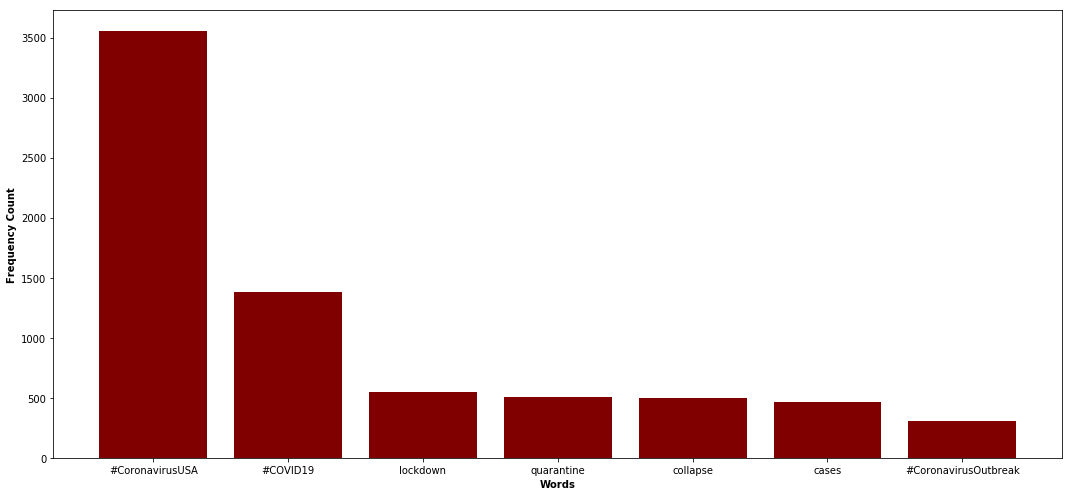

In [99]:
x1=['#CoronavirusUSA','#COVID19','lockdown','quarantine','collapse','cases','#CoronavirusOutbreak']
y1=[3553,1377,547,509,497,464,303]

import seaborn as sns
import matplotlib.pyplot as plt
# creating the bar plot
# Figure Size
fig = plt.figure(figsize =(15, 7))
plt.bar(x1, y1, color ='maroon')

plt.xlabel("Words",fontweight='bold')
plt.ylabel("Frequency Count",fontweight='bold')
plt.tight_layout()
#plt.title("Students enrolled in different courses")
plt.savefig('COVIDWordCount.pdf')
plt.show()

In [17]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(mask='p.png', background_color='white', width = 300, height=300, margin=2)
unique_string=(" ").join(PositiveTweet)
wc.generate(unique_string)
wc.to_file('pos.png')

AttributeError: 'str' object has no attribute 'dtype'

In [8]:
print(Sentiment.count(0))
print(Sentiment.count(1))

7876
3982


In [7]:
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding,GlobalMaxPooling1D
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

Using TensorFlow backend.


In [8]:
#converting twitterSentiment[] list into dataframe for serving it to keras tokenizer
dataSetFinal = pd.DataFrame(np.array(TEXT))
dataSetFinal.head(2)

,0
0,kahruveldesign wrote jan phones ringing need g...
1,please share warning popularity https co wbycg...


In [9]:
dataSentiment = pd.DataFrame(np.array(Sentiment))
dataSentiment.head(2)

,0
0,0
1,0


In [10]:
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=2500, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(dataSetFinal[0].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(dataSetFinal[0].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)

In [11]:
from keras import optimizers
from keras import regularizers
from keras import backend as K
weight_decay = 1e-4
#Deep Learning Network Structure
model = Sequential()
model.add(Embedding(2500,100, input_length=X.shape[1]))
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(2, activation='softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall()])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 100)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 64)            32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 11, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
__________

In [ ]:
#CNN
batch_size=64
Y = pd.get_dummies(dataSentiment[0]).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.30)
#Here we train the Network.
pred=model.fit(X_train, Y_train, batch_size =batch_size, epochs =50, verbose =2,validation_data=(X_valid,Y_valid))
pred

Train on 8300 samples, validate on 3558 samples
Epoch 1/50


In [ ]:
score=[]
score=model.evaluate(X_valid,Y_valid,verbose=2,batch_size=batch_size)
#keras.metrics.binary_accuracy(Y_valid,pred)
print("score: %.2f" %(score[0]))
print("validation accuracy: %.2f" % (score[1]))
print("recall: %.2f" %(score[4]))
print("Precision: %.2f" % (score[3]))